In [1]:
from record import *
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import peak_widths
import scipy

In [2]:
from os import listdir
from os.path import isfile, join
mypath='./LSDWA-F/LSDWA-F_29-07-2019_12-13/'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [83]:
t=Record("./LSDWA-F/LSDWA-F_29-07-2019_12-13/F20190729120057.dat")

getting header


In [84]:
files[6]

'F20190729125822.dat'

In [85]:
b, a = scipy.signal.iirfilter(4, Wn=2, fs=50, btype="high", ftype="butter")

In [86]:
yfilt = scipy.signal.lfilter(b, a, t.chanel2)

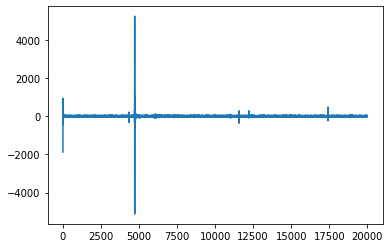

In [87]:
plt.plot(yfilt[0:20000])

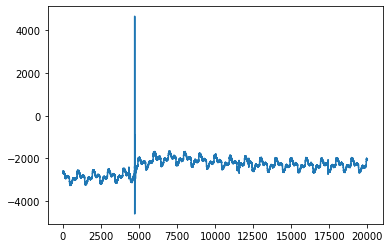

In [88]:
plt.plot(t.chanel2[0:20000])

In [21]:
scipy.fft.fft(t.chanel2[0:20000])

array([ 5.67128580e+07      -0.j        ,
       -1.24596379e+04+2558630.48963493j,
        3.49803855e+05 +270654.25806468j, ...,
       -1.74862803e+06 -862083.73403105j,
        3.49803855e+05 -270654.25806468j,
       -1.24596379e+04-2558630.48963493j])

[    7   636  1236  1586  1653  2744  2769  3370  3577  3597  4480  4571
  5655  5746  6352  6443  6459  6743  6794  6839  6929  6971  7144  7654
  8146  8237  8637  8931  9069  9238  9656 10005 10070 10639 10653 10915
 11146 11283 11688 11968 13122 13208 13281 13335 13655 13727 14037 14058
 14391 14958 15149 16309 16324 16339 17147 17731 18147 18167 18897 19021
 19146 19239 19254 19350 19439 19815 19871]


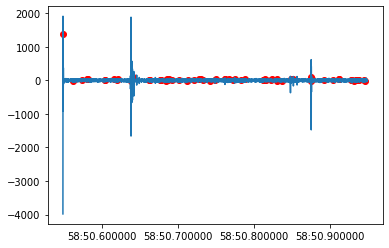

In [79]:
plt.plot(t.date[0:20000],yfilt[0:20000])

peakind = signal.find_peaks_cwt(yfilt[0:20000], widths=5,noise_perc=1)
#peakind, _ = find_peaks(yfilt[0:20000], threshold=20, distance=400)
print(peakind)
if len(peakind)==0:
    peakind, _ = find_peaks(-yfilt[0:20000], threshold=20, distance=400)
    
for i in range(len(peakind)):
    plt.scatter(t.date[peakind[i]], yfilt[0:20000][peakind[i]], c='r')
plt.show()

NameError: name 'peakind' is not defined

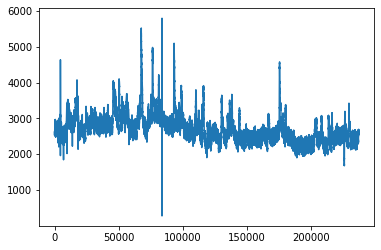

In [16]:
plt.plot(t.chanel2)
plt.scatter(peakind,t.chanel1[peakind], c='r')

In [7]:
print(str(t.date[peakind[0]].hour)+':'+str(t.date[peakind[0]].minute)+':'+str(t.date[peakind[0]].second)+'.'+str(t.date[peakind[0]].microsecond))

12:0:57.471249


In [8]:
dates=[]

for i in range(10):
    t=Record(mypath+files[i])
    peakind, _ = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
    if len(peakind)==0:
        peakind, _ = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    dates.append((str(t.date[peakind[0]].hour)+':'+str(t.date[peakind[0]].minute)+':'+str(t.date[peakind[0]].second)+'.'+str(t.date[peakind[0]].microsecond)))
dates    

getting header
getting header
getting header
getting header
getting header
getting header
getting header
getting header
getting header
getting header


['12:0:57.471249',
 '12:1:16.43346',
 '12:2:1.324920',
 '12:2:35.291262',
 '12:2:51.447470',
 '12:3:16.753765',
 '12:3:22.119343',
 '12:3:40.856057',
 '12:3:45.248092',
 '12:4:15.807022']

getting header


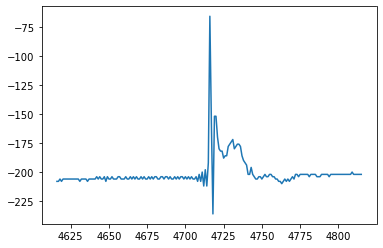

In [9]:
t=Record(mypath+files[0])
peakind, properties = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
if len(peakind)==0:
    peakind, properties = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    
if len(peakind)>=1:
    ind=np.arange(peakind[0]-100,peakind[0]+100,1)
    plt.plot(ind,t.chanel1[ind])
else:
    print('Trigger not found')
    


#### 

In [10]:
peak_widths(t.chanel1[0:20000], peakind)

(array([1.39164941]),
 array([-140.]),
 array([4715.41269841]),
 array([4716.80434783]))